In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### data pre processing

### training preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\yesha\Downloads\plant diseases.keras\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)


Found 69869 files belonging to 38 classes.


### validation image processing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\yesha\Downloads\plant diseases.keras\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)


Found 69869 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,y.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 60.    61.25  81.75]
   [124.25 126.25 149.25]
   [130.25 131.25 159.25]
   ...
   [129.75 126.75 147.75]
   [145.   142.   163.  ]
   [135.75 132.75 153.75]]

  [[ 66.    67.5   88.25]
   [123.25 125.25 148.25]
   [128.25 129.25 157.25]
   ...
   [135.25 132.25 153.25]
   [152.   149.   170.  ]
   [128.5  125.5  146.5 ]]

  [[ 62.5   64.    84.5 ]
   [120.25 122.25 145.25]
   [119.75 120.75 148.75]
   ...
   [131.25 128.25 149.25]
   [123.   120.   141.  ]
   [153.75 150.75 171.75]]

  ...

  [[ 66.    68.5   90.25]
   [135.   139.   164.  ]
   [134.75 138.75 167.75]
   ...
   [185.75 182.75 201.75]
   [179.5  176.5  195.5 ]
   [180.75 177.75 196.75]]

  [[ 66.5   69.    91.  ]
   [137.   141.   166.  ]
   [136.   140.   169.  ]
   ...
   [192.25 189.25 208.25]
   [189.5  186.5  205.5 ]
   [188.   185.   204.  ]]

  [[ 66.    68.5   90.  ]
   [137.5  141.5  166.5 ]
   [137.75 141.75 170.75]
   ...
   [193.75 190.75 209.75]
   [188.   185.   204.  ]
   [187.75 184.75 20

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [13]:
model=Sequential()

### building convolution layer

In [14]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\yesha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=5112, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))

In [22]:
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### compiling model

In [23]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 5112)     │    23,561,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 5112)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 5112)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    20,939,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,892,350 (178.88 MB)

 Trainable params: 46,892,350 (178.88 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=1, verbose=1)

2184/2184 ━━━━━━━━━━━━━━━━━━━━ 3402s 2s/step - accuracy: 0.6508 - loss: 1.1536 - val_accuracy: 0.8872 - val_loss: 0.3559


In [33]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=2, verbose=1)

Epoch 1/2
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 3642s 2s/step - accuracy: 0.8930 - loss: 0.3345 - val_accuracy: 0.9502 - val_loss: 0.1506
Epoch 2/2
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 3072s 1s/step - accuracy: 0.9391 - loss: 0.1888 - val_accuracy: 0.9673 - val_loss: 0.1012


### model evaluation

In [34]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2184/2184 ━━━━━━━━━━━━━━━━━━━━ 649s 297ms/step - accuracy: 0.9632 - loss: 0.1153


In [35]:
print(train_loss,train_acc)

0.10118307918310165 0.9672816395759583


In [36]:
#model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

2184/2184 ━━━━━━━━━━━━━━━━━━━━ 582s 267ms/step - accuracy: 0.9678 - loss: 0.0999


In [37]:
print(val_loss,val_acc)

0.10118311643600464 0.9672816395759583


### saving model

In [38]:
model.save("trained_model_final.h5")

In [39]:
model.save("trained_model_final.keras")

In [40]:
training_history.history 

{'accuracy': [0.907097578048706, 0.9441382884979248],
 'loss': [0.2879732847213745, 0.1720195859670639],
 'val_accuracy': [0.9501782059669495, 0.9672816395759583],
 'val_loss': [0.1506083905696869, 0.10118314623832703]}

In [41]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history , f)

### accuracy visualization

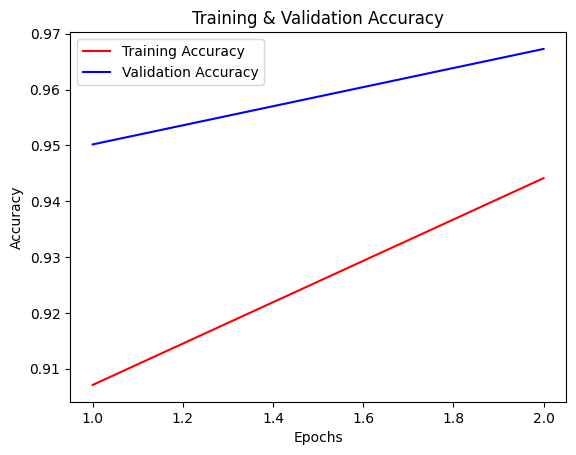

In [42]:
# Ensure epoch range matches training history length
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


### some other metricsfor model evaluation

In [43]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\yesha\Downloads\plant diseases.keras\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)


Found 69869 files belonging to 38 classes.


In [45]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2184/2184 ━━━━━━━━━━━━━━━━━━━━ 591s 270ms/step


(array([[9.98109818e-01, 5.83745015e-04, 3.67454106e-07, ...,
         9.87376292e-11, 1.03231895e-10, 6.02262446e-07],
        [9.99829769e-01, 5.98265704e-09, 1.54346938e-10, ...,
         1.88067183e-12, 5.60978672e-13, 7.37386596e-10],
        [9.99928951e-01, 6.81905522e-06, 1.63433338e-08, ...,
         9.67427041e-11, 5.68878666e-10, 1.17303933e-09],
        ...,
        [1.29614014e-10, 7.61652061e-11, 8.01921377e-12, ...,
         5.32667389e-13, 1.77283893e-12, 9.99975443e-01],
        [5.50841664e-11, 7.50878699e-12, 1.52621812e-13, ...,
         1.65609578e-14, 7.08442636e-14, 9.99951482e-01],
        [5.41012068e-10, 2.73597768e-12, 7.80996708e-12, ...,
         1.20355568e-15, 1.64891850e-13, 9.99859095e-01]], dtype=float32),
 (69869, 38))

In [46]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [47]:
predicted_categories

<tf.Tensor: shape=(69869,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [49]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(69869, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [50]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(69869,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.99      0.94      2016
                                 Apple___Black_rot       0.99      0.96      0.98      1987
                          Apple___Cedar_apple_rust       0.95      0.99      0.97      1760
                                   Apple___healthy       0.98      0.93      0.95      2008
                               Blueberry___healthy       0.99      0.94      0.96      1816
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.99      1683
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99      1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.92      0.95      1216
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00      1907
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.99      0.

In [53]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[1989,    0,    1, ...,    0,    0,    0],
       [  47, 1906,    0, ...,    0,    0,    0],
       [   2,    0, 1751, ...,    0,    0,    1],
       ...,
       [   0,    0,    1, ..., 1904,    0,    0],
       [   2,    0,    0, ...,    0, 1513,    7],
       [   7,    0,    0, ...,    0,    0, 1914]])

### confusion matrix visualization

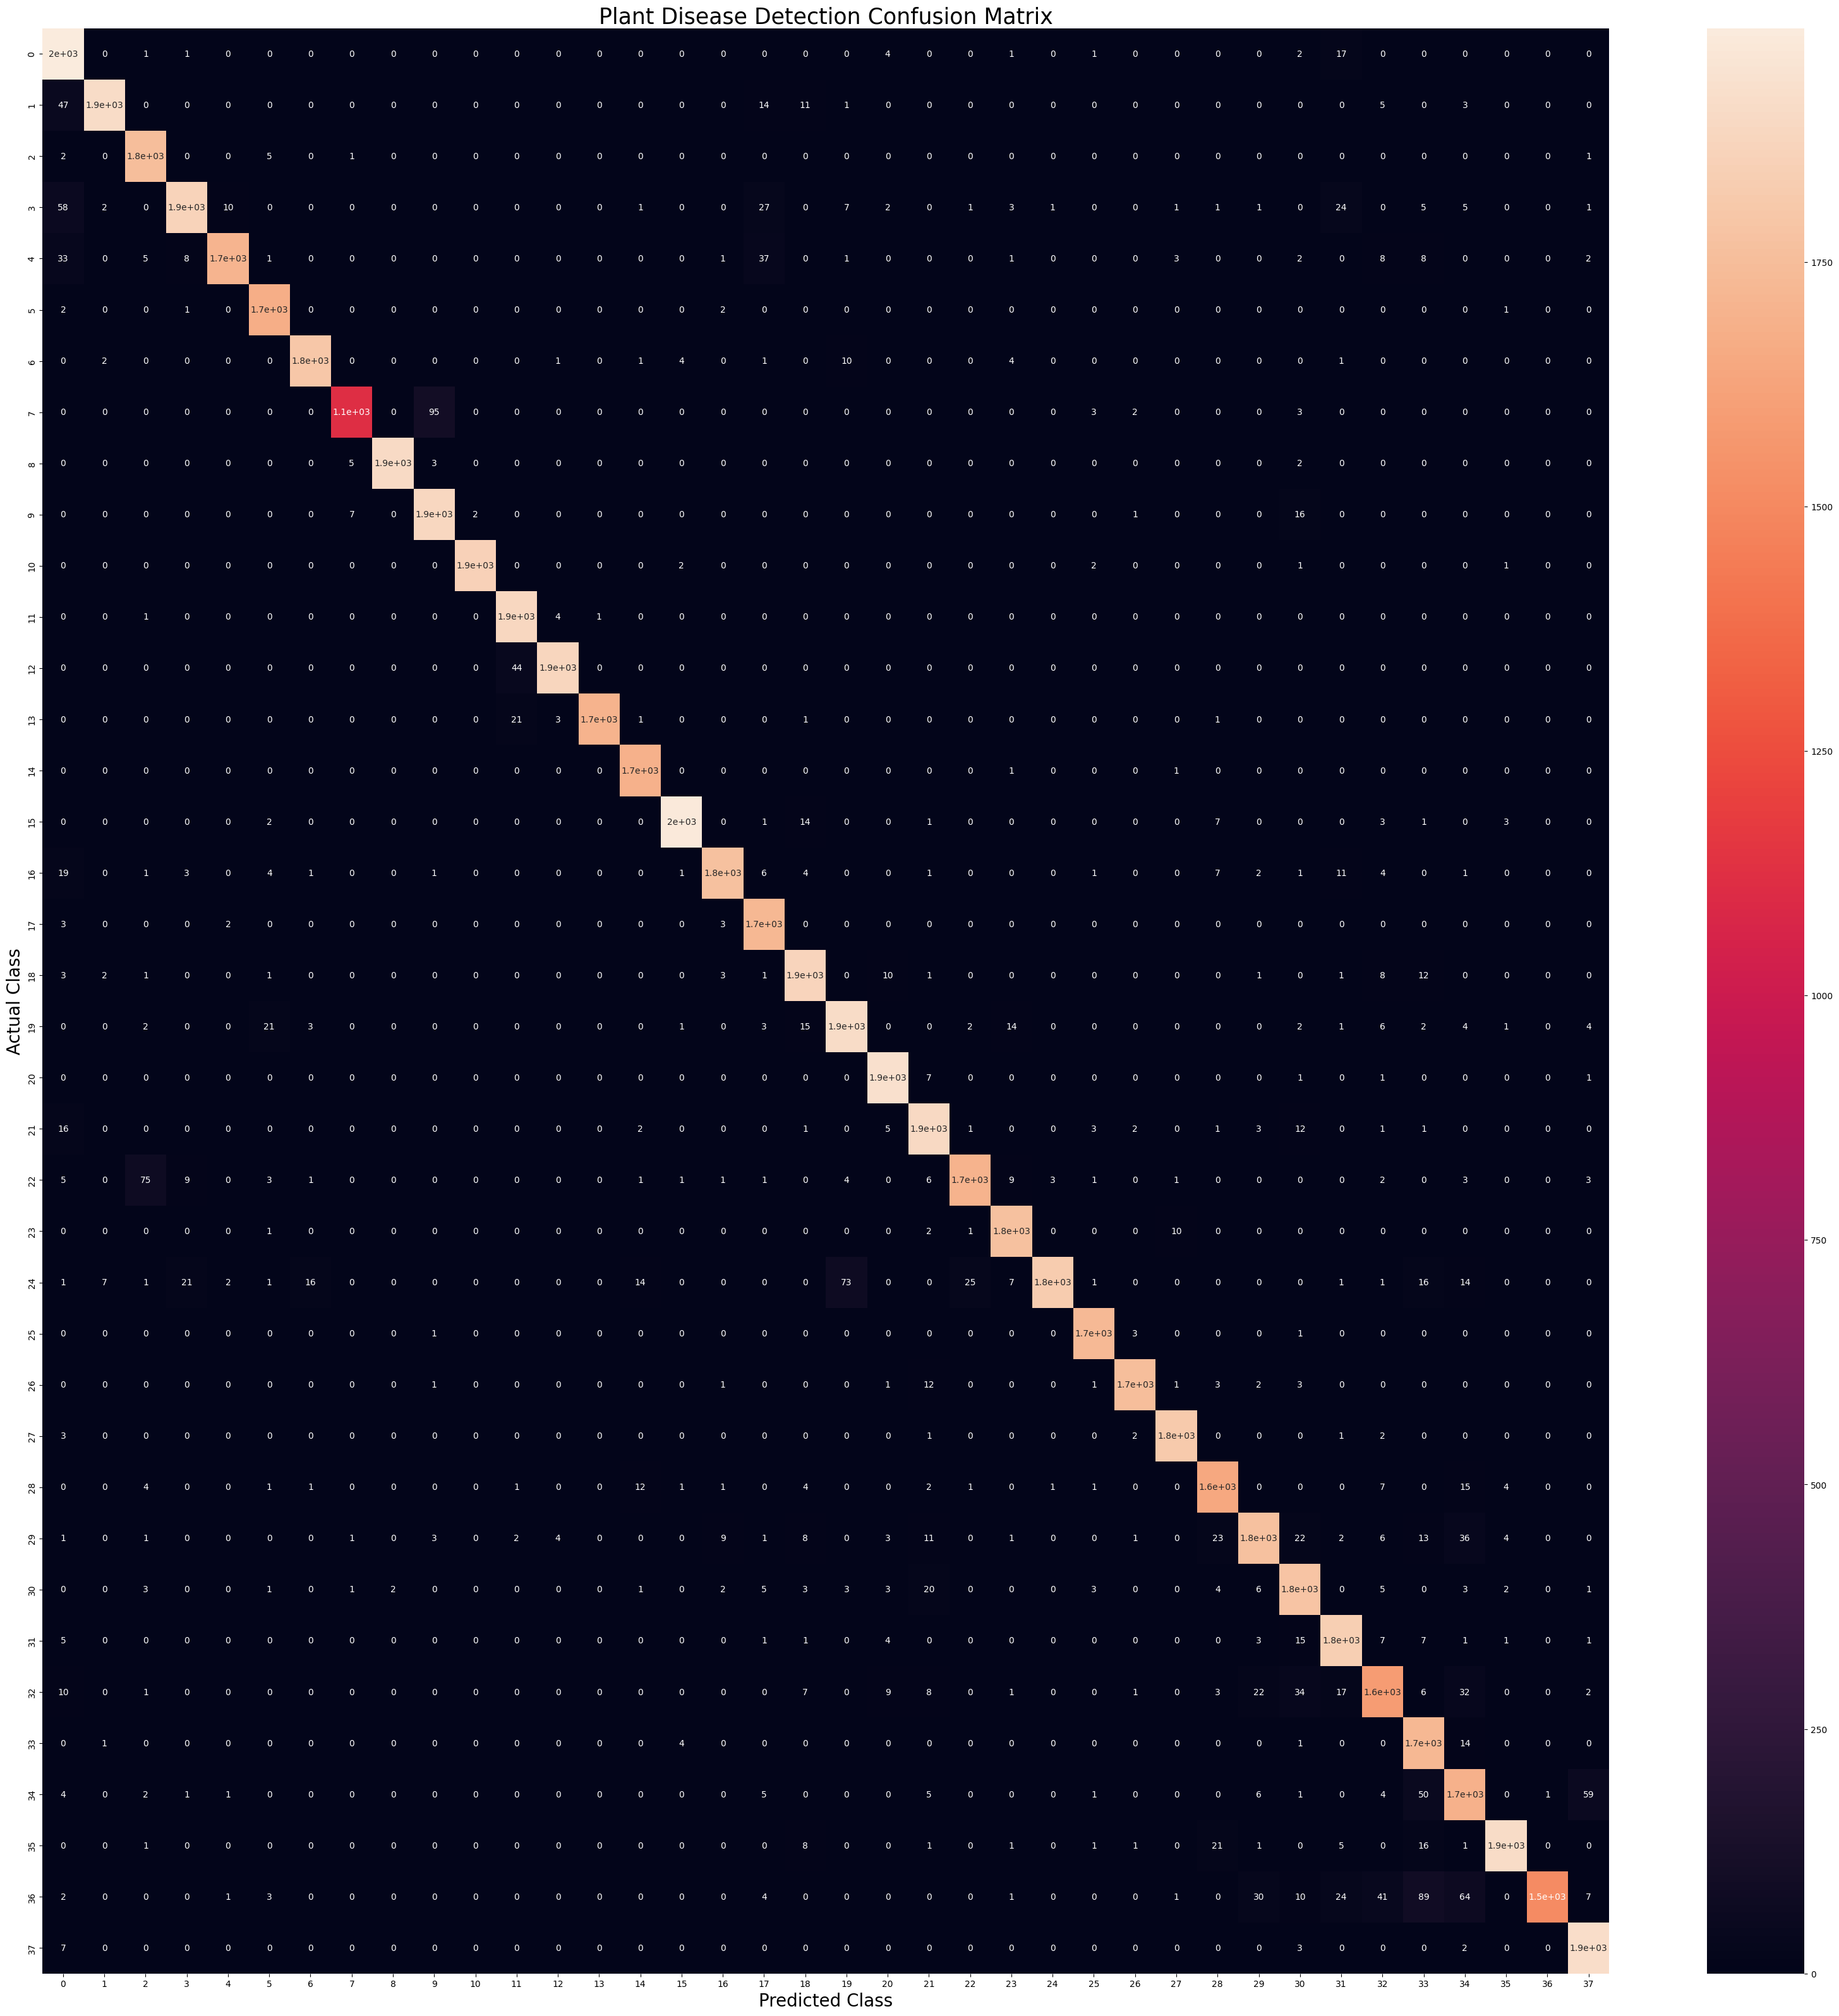

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})  # ✅ Use curly braces for a dictionary
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Detection Confusion Matrix", fontsize=25)
plt.show()
